In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb

In [2]:
sentence1 = """
(강릉=연합뉴스) 강태현 기자 = 강원 강릉에서 11일 발생한 대형산불이 8시간 만에 주불 진화가 완료된 가운데 재발화 위험을 완전히 차단하기 위해 산림 당국이 12일 일출과 동시에 헬기와 인력을 투입했다.
"""
sentence2 = """
산림 당국은 이날 오전 6시께 임차 헬기 1대를 투입해 산불 현장 전반을 살피고 있다.
"""

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 100)

In [4]:
index_word = { v:k for k,v in imdb.get_word_index().items()}
index_word

1641221/1641221 [==============================] - 1s 0us/step


{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [5]:
np.array(X_train[0])

array([ 1, 14, 22, 16, 43,  2,  2,  2,  2, 65,  2,  2, 66,  2,  4,  2, 36,
        2,  5, 25,  2, 43,  2,  2, 50,  2,  2,  9, 35,  2,  2,  5,  2,  4,
        2,  2,  2,  2,  2,  2, 39,  4,  2,  2,  2, 17,  2, 38, 13,  2,  4,
        2, 50, 16,  6,  2,  2, 19, 14, 22,  4,  2,  2,  2,  4, 22, 71, 87,
       12, 16, 43,  2, 38, 76, 15, 13,  2,  4, 22, 17,  2, 17, 12, 16,  2,
       18,  2,  5, 62,  2, 12,  8,  2,  8,  2,  5,  4,  2,  2, 16,  2, 66,
        2, 33,  4,  2, 12, 16, 38,  2,  5, 25,  2, 51, 36,  2, 48, 25,  2,
       33,  6, 22, 12,  2, 28, 77, 52,  5, 14,  2, 16, 82,  2,  8,  4,  2,
        2,  2, 15,  2,  4,  2,  7,  2,  5,  2, 36, 71, 43,  2,  2, 26,  2,
        2, 46,  7,  4,  2,  2, 13,  2, 88,  4,  2, 15,  2, 98, 32,  2, 56,
       26,  2,  6,  2,  2, 18,  4,  2, 22, 21,  2,  2, 26,  2,  5,  2, 30,
        2, 18, 51, 36, 28,  2, 92, 25,  2,  4,  2, 65, 16, 38,  2, 88, 12,
       16,  2,  5, 16,  2,  2,  2, 32, 15, 16,  2, 19,  2, 32])

In [6]:
sentence = ''
for i in X_train[0]:
    sentence += ' '+index_word.get(i)
sentence

' the as you with out and and and and their and and had and of and from and to have and out and and more and and it so and and to and of and and and and and and or of and and and movie and her was and of and more with is and and film as you of and and and of you than him that with out and her get for was and of you movie and movie that with and but and to story and that in and in and to of and and with and had and they of and that with her and to have and when from and what have and they is you that and one will very to as and with other and in of and and and for and of and br and to and from than out and and he and and some br of and and was and most of and for and any an and she he and is and and but of and you not and and he and to and at and but when from one and then have and of and their with her and most that with and to with and and and an for with and film and an'

In [7]:
test = pd.Series(X_train).apply(lambda x : x[:10])

In [8]:
test[0:2]

0    [1, 14, 22, 16, 43, 2, 2, 2, 2, 65]
1        [1, 2, 2, 2, 2, 78, 2, 5, 6, 2]
dtype: object

In [9]:
dt = pd.Series([sentence1,sentence2])

In [10]:
dt = pd.DataFrame(dt)

In [11]:
dt['mood'] = [0,1]

In [12]:
dt

,0,mood
0,\n(강릉=연합뉴스) 강태현 기자 = 강원 강릉에서 11일 발생한 대형산불이 8시간...,0
1,\n산림 당국은 이날 오전 6시께 임차 헬기 1대를 투입해 산불 현장 전반을 살피고...,1


In [13]:
X = dt.iloc[:,0]
y = dt.iloc[:,1]

In [14]:
X.values.shape

(2,)

In [15]:
y

0    0
1    1
Name: mood, dtype: int64

In [16]:
word = []
for i in X_train:
    word.extend(i)

In [17]:
word = list(set(word))

In [18]:
test = X_train[:1000]

In [19]:
x = np.zeros((1000,100))
for i,v in enumerate(test):
    for j in v:
        x[i,j-1] += 1

In [20]:
y = y_train[:1000]

In [21]:
y = y.reshape(-1,1)

In [22]:
x.shape, y.shape

((1000, 100), (1000, 1))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential(
    [
        Dense(256,activation='relu',input_shape=[100]),
        Dense(128,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,881
Trainable params: 58,881
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [27]:
model.fit(x,y,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 2.7730 - accuracy: 0.5360
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 1.7613 - accuracy: 0.5310
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4598 - accuracy: 0.5560
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3527 - accuracy: 0.5650
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1019 - accuracy: 0.6310
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9465 - accuracy: 0.6490
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0085 - accuracy: 0.6410
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.6730
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.6870
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.6900
Epoch 11/20
32/32 [

In [28]:
test1 = X_test[:500]

In [29]:
x = np.zeros((500,100))
for i,v in enumerate(test1):
    for j in v:
        x[i,j-1] += 1

In [30]:
x.shape

(500, 100)

In [31]:
model.predict(x).shape

16/16 [==============================] - 0s 1ms/step


(500, 1)

In [32]:
np.sum(np.where(model.predict(x)>.5,1,0) == y_test[:500].reshape(-1,1))/500

16/16 [==============================] - 0s 2ms/step


0.616

In [33]:
y_test[:500].shape

(500,)

In [34]:
from tensorflow.keras.datasets import reuters

In [35]:
(X_train, y_train),(X_test,y_test) = reuters.load_data()

2110848/2110848 [==============================] - 1s 1us/step


In [36]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [37]:
y_train[0]

3

In [38]:
word_index = reuters.get_word_index()
index_word = { v:k for k, v in word_index.items()}

550378/550378 [==============================] - 0s 1us/step


In [39]:
max(index_word.keys())

30979

In [40]:
sentence = ''
for i in X_train[0]:
    sentence += ' '+index_word.get(i)

In [41]:
sentence

' the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [42]:
X_train.shape

(8982,)

In [43]:
X = np.zeros((8982,30979))

In [44]:
del X

In [45]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [46]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=2000)

In [47]:
word_index = reuters.get_word_index()
index_word = { v:k for k, v in word_index.items()}

In [48]:
X_train_trans = np.zeros((8982,2000))
for i, v in enumerate(X_train):
    for j in v:
        X_train_trans[i,j] += 1

In [49]:
y_train_trans = to_categorical(y_train)

In [50]:
y_train_trans.shape

(8982, 46)

In [51]:
model = Sequential(
    [
        Dense(256,activation='relu',input_shape=[2000]),
        Dense(128,activation='relu'),
        Dense(46,activation='softmax'),
    ]
)

In [52]:
optimizer='rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [53]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=20)

Epoch 1/20
281/281 [==============================] - 2s 5ms/step - loss: 1.3313 - accuracy: 0.7201
Epoch 2/20
281/281 [==============================] - 1s 5ms/step - loss: 0.7056 - accuracy: 0.8445
Epoch 3/20
281/281 [==============================] - 1s 5ms/step - loss: 0.4859 - accuracy: 0.8893
Epoch 4/20
281/281 [==============================] - 1s 5ms/step - loss: 0.3564 - accuracy: 0.9181
Epoch 5/20
281/281 [==============================] - 1s 5ms/step - loss: 0.2922 - accuracy: 0.9306
Epoch 6/20
281/281 [==============================] - 1s 5ms/step - loss: 0.2504 - accuracy: 0.9390
Epoch 7/20
281/281 [==============================] - 1s 5ms/step - loss: 0.2252 - accuracy: 0.9449
Epoch 8/20
281/281 [==============================] - 1s 5ms/step - loss: 0.2093 - accuracy: 0.9496
Epoch 9/20
281/281 [==============================] - 2s 6ms/step - loss: 0.1957 - accuracy: 0.9492
Epoch 10/20
281/281 [==============================] - 2s 5ms/step - loss: 0.1881 - accuracy: 0.9497

In [54]:
X_test_trans = np.zeros((len(X_test),2000))
for i, v in enumerate(X_test):
    for j in v:
        X_test_trans[i,j] += 1

In [55]:
np.argmax(model.predict(X_test_trans),axis=1) == y_test

71/71 [==============================] - 0s 2ms/step


array([ True,  True,  True, ...,  True, False,  True])

In [56]:
np.sum(np.argmax(model.predict(X_test_trans),axis=1) == y_test)/2246

71/71 [==============================] - 0s 2ms/step


0.7831700801424755

In [57]:
y_test.shape

(2246,)

In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train_trans, y_train_trans)

RandomForestClassifier()

In [60]:
rf.score(X_train_trans,y_train_trans)

0.9575818303273214

In [61]:
rf.score(X_test_trans, to_categorical(y_test))

0.5970614425645592

In [62]:
sentence = ''
for i in X_train[0]:
    sentence += ' '+index_word.get(i)
sentence

' the of of mln loss for plc said at only ended said of could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [63]:
pd.DataFrame(X_train_trans[[0]])

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,1.0,4.0,0.0,1.0,3.0,6.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
pd.Series(X_train).apply(len)
## length 맞춘 padding 

0        87
1        56
2       139
3       224
4       101
       ... 
8977    197
8978    214
8979     77
8980    119
8981    105
Length: 8982, dtype: int64

In [65]:
from tensorflow.keras.utils import pad_sequences

In [66]:
pad_sequences(X_train,100)

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]])

In [67]:
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D

In [68]:
model = Sequential(
            [
                Embedding(2000,20,input_length=100),
                Conv1D(10,5,activation='relu'),
                MaxPooling1D(3),
                Flatten(),
                Dense(256,activation='relu'),
                Dense(46,activation='softmax')
            ]
        )

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 20)           40000     
                                                                 
 conv1d (Conv1D)             (None, 96, 10)            1010      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 10)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               82176     
                                                                 
 dense_7 (Dense)             (None, 46)                11822     
                                                      

In [70]:
pad_sequences(X_train,100)[[0]]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    2,    2,    8,   43,   10,  447,    5,   25,
         207,  270,    5,    2,  111,   16,  369,  186,   90,   67,    7,
          89,    5,   19,  102,    6,   19,  124,   15,   90,   67,   84,
          22,  482,   26,    7,   48,    4,   49,    8,  864,   39,  209,
         154,    6,  151,    6,   83,   11,   15,   22,  155,   11,   15,
           7,   48,    9,    2, 1005,  504,    6,  258,    6,  272,   11,
          15,   22,  134,   44,   11,   15,   16,    8,  197, 1245,   90,
          67,   52,   29,  209,   30,   32,  132,    6,  109,   15,   17,
          12]])

In [71]:
model.predict(pad_sequences(X_train,100)[[0]]).shape

1/1 [==============================] - 0s 92ms/step


(1, 46)

In [72]:
model = Sequential(
    [
        Embedding(2000,100,input_length=100),
        Flatten(),
        Dense(256,activation='relu'),
        Dense(46,activation='softmax')
    ]
)

In [73]:
X_train_trans = pad_sequences(X_train,100)
X_test_trans = pad_sequences(X_test,100)
y_train_trans = to_categorical(y_train)
y_test_trans = to_categorical(y_test)

In [74]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [75]:
model.fit(
    X_train_trans,
    y_train_trans,
    epochs=20,
    validation_data=(X_test_trans,y_test_trans)
)

Epoch 1/20
281/281 [==============================] - 5s 18ms/step - loss: 1.6403 - accuracy: 0.5907 - val_loss: 1.3631 - val_accuracy: 0.6687
Epoch 2/20
281/281 [==============================] - 5s 18ms/step - loss: 0.7807 - accuracy: 0.8164 - val_loss: 1.3349 - val_accuracy: 0.6852
Epoch 3/20
281/281 [==============================] - 5s 19ms/step - loss: 0.3306 - accuracy: 0.9377 - val_loss: 1.4438 - val_accuracy: 0.6941
Epoch 4/20
281/281 [==============================] - 5s 19ms/step - loss: 0.2314 - accuracy: 0.9490 - val_loss: 1.5110 - val_accuracy: 0.6861
Epoch 5/20
281/281 [==============================] - 5s 19ms/step - loss: 0.1824 - accuracy: 0.9519 - val_loss: 1.6130 - val_accuracy: 0.6883
Epoch 6/20
281/281 [==============================] - 5s 19ms/step - loss: 0.1535 - accuracy: 0.9529 - val_loss: 1.8189 - val_accuracy: 0.6879
Epoch 7/20
281/281 [==============================] - 5s 18ms/step - loss: 0.1392 - accuracy: 0.9541 - val_loss: 1.9128 - val_accuracy: 0.6861

In [76]:
model.evaluate(X_test_trans,y_test_trans)

71/71 [==============================] - 0s 4ms/step - loss: 3.1200 - accuracy: 0.6505


[3.1199729442596436, 0.6504897475242615]

In [77]:
X_train_trans.shape, y_train_trans.shape

((8982, 100), (8982, 46))

In [78]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential(
    [
        Embedding(2000,100,input_length=100),
        Conv1D(50,6,activation='relu'),
        BatchNormalization(),
        MaxPooling1D(5),
        Flatten(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(46,activation='softmax')
    ]
)

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          200000    
                                                                 
 conv1d_1 (Conv1D)           (None, 95, 50)            30050     
                                                                 
 batch_normalization (BatchN  (None, 95, 50)           200       
 ormalization)                                                   
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 50)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 950)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [80]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [81]:
X_train_trans.shape, y_train_trans.shape, X_test_trans.shape, y_test_trans.shape 

((8982, 100), (8982, 46), (2246, 100), (2246, 46))

In [82]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=20,
         validation_data=(X_test_trans,y_test_trans))

Epoch 1/20
281/281 [==============================] - 6s 16ms/step - loss: 1.9395 - accuracy: 0.5731 - val_loss: 3.2584 - val_accuracy: 0.2284
Epoch 2/20
281/281 [==============================] - 5s 18ms/step - loss: 0.8523 - accuracy: 0.7994 - val_loss: 1.7723 - val_accuracy: 0.6095
Epoch 3/20
281/281 [==============================] - 4s 16ms/step - loss: 0.4449 - accuracy: 0.9187 - val_loss: 1.4928 - val_accuracy: 0.6812
Epoch 4/20
281/281 [==============================] - 5s 17ms/step - loss: 0.3236 - accuracy: 0.9420 - val_loss: 1.5154 - val_accuracy: 0.6741
Epoch 5/20
281/281 [==============================] - 5s 17ms/step - loss: 0.2687 - accuracy: 0.9480 - val_loss: 1.4710 - val_accuracy: 0.6892
Epoch 6/20
281/281 [==============================] - 5s 18ms/step - loss: 0.2346 - accuracy: 0.9520 - val_loss: 1.4765 - val_accuracy: 0.6977
Epoch 7/20
281/281 [==============================] - 7s 24ms/step - loss: 0.2173 - accuracy: 0.9518 - val_loss: 1.4591 - val_accuracy: 0.6928

In [83]:
X_test_trans = np.zeros((len(X_test),2000))
for i, v in enumerate(X_test):
    for j in v:
        X_test_trans[i,j] += 1

In [85]:
np.argmax(model.predict(X_test_trans),axis=1) == y_test

ValueError: in user code:

    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 2000)


In [86]:
np.sum(np.argmax(model.predict(X_test_trans),axis=1) == y_test)/2246

ValueError: in user code:

    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\bjlov\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 2000)


In [87]:
y_test.shape

(2246,)

In [88]:
rf = RandomForestClassifier()

In [89]:
rf.fit(X_train_trans, y_train_trans)

RandomForestClassifier()

In [90]:
rf.fit(X_train_trans, y_train_trans)

RandomForestClassifier()

In [91]:
sentence = ''
for i in X_train[0]:
    sentence += ' '+index_word.get(i)
sentence

' the of of mln loss for plc said at only ended said of could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [92]:
pd.DataFrame(X_train_trans[[0]])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,29,209,30,32,132,6,109,15,17,12


In [93]:
pd.Series(X_train).apply(len)
## length 맞춘 padding 

0        87
1        56
2       139
3       224
4       101
       ... 
8977    197
8978    214
8979     77
8980    119
8981    105
Length: 8982, dtype: int64

In [94]:
from tensorflow.keras.utils import pad_sequences

In [95]:
pad_sequences(X_train,100)

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]])

In [96]:
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D

In [97]:
model = Sequential(
            [
                Embedding(2000,20,input_length=100),
                Conv1D(10,5,activation='relu'),
                MaxPooling1D(3),
                Flatten(),
                Dense(256,activation='relu'),
                Dense(46,activation='softmax')
            ]
        )

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 20)           40000     
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 10)            1010      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 32, 10)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               82176     
                                                                 
 dense_13 (Dense)            (None, 46)                11822     
                                                      

In [99]:
pad_sequences(X_train,100)[[0]]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    2,    2,    8,   43,   10,  447,    5,   25,
         207,  270,    5,    2,  111,   16,  369,  186,   90,   67,    7,
          89,    5,   19,  102,    6,   19,  124,   15,   90,   67,   84,
          22,  482,   26,    7,   48,    4,   49,    8,  864,   39,  209,
         154,    6,  151,    6,   83,   11,   15,   22,  155,   11,   15,
           7,   48,    9,    2, 1005,  504,    6,  258,    6,  272,   11,
          15,   22,  134,   44,   11,   15,   16,    8,  197, 1245,   90,
          67,   52,   29,  209,   30,   32,  132,    6,  109,   15,   17,
          12]])

In [100]:
model.predict(pad_sequences(X_train,100)[[0]]).shape

1/1 [==============================] - 0s 68ms/step


(1, 46)

In [101]:
model = Sequential(
    [
        Embedding(2000,100,input_length=100),
        Flatten(),
        Dense(256,activation='relu'),
        Dense(46,activation='softmax')
    ]
)

In [102]:
X_train_trans = pad_sequences(X_train,100)
X_test_trans = pad_sequences(X_test,100)
y_train_trans = to_categorical(y_train)
y_test_trans = to_categorical(y_test)

In [103]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [104]:
model.fit(
    X_train_trans,
    y_train_trans,
    epochs=20,
    validation_data=(X_test_trans,y_test_trans)
)

Epoch 1/20
281/281 [==============================] - 6s 19ms/step - loss: 1.6566 - accuracy: 0.5898 - val_loss: 1.3469 - val_accuracy: 0.6714
Epoch 2/20
281/281 [==============================] - 5s 17ms/step - loss: 0.7702 - accuracy: 0.8182 - val_loss: 1.3004 - val_accuracy: 0.6910
Epoch 3/20
281/281 [==============================] - 5s 18ms/step - loss: 0.3267 - accuracy: 0.9365 - val_loss: 1.4053 - val_accuracy: 0.6932
Epoch 4/20
281/281 [==============================] - 5s 19ms/step - loss: 0.2293 - accuracy: 0.9498 - val_loss: 1.4690 - val_accuracy: 0.6941
Epoch 5/20
281/281 [==============================] - 6s 20ms/step - loss: 0.1796 - accuracy: 0.9503 - val_loss: 1.5751 - val_accuracy: 0.6990
Epoch 6/20
281/281 [==============================] - 6s 21ms/step - loss: 0.1532 - accuracy: 0.9511 - val_loss: 1.7374 - val_accuracy: 0.6950
Epoch 7/20
281/281 [==============================] - 6s 21ms/step - loss: 0.1316 - accuracy: 0.9502 - val_loss: 2.0019 - val_accuracy: 0.6937

In [105]:
model.fit(
    X_train_trans,
    y_train_trans,
    epochs=20,
    validation_data=(X_test_trans,y_test_trans)
)

Epoch 1/20
281/281 [==============================] - 6s 21ms/step - loss: 0.0959 - accuracy: 0.9556 - val_loss: 3.4690 - val_accuracy: 0.6647
Epoch 2/20
281/281 [==============================] - 6s 21ms/step - loss: 0.0939 - accuracy: 0.9570 - val_loss: 3.6637 - val_accuracy: 0.6585
Epoch 3/20
281/281 [==============================] - 8s 29ms/step - loss: 0.0960 - accuracy: 0.9565 - val_loss: 3.6570 - val_accuracy: 0.6585
Epoch 4/20
281/281 [==============================] - 9s 31ms/step - loss: 0.0985 - accuracy: 0.9551 - val_loss: 4.0515 - val_accuracy: 0.6514
Epoch 5/20
281/281 [==============================] - 6s 23ms/step - loss: 0.0960 - accuracy: 0.9547 - val_loss: 3.9260 - val_accuracy: 0.6500
Epoch 6/20
281/281 [==============================] - 6s 22ms/step - loss: 0.0964 - accuracy: 0.9574 - val_loss: 3.8501 - val_accuracy: 0.6465
Epoch 7/20
281/281 [==============================] - 6s 22ms/step - loss: 0.0940 - accuracy: 0.9570 - val_loss: 4.1845 - val_accuracy: 0.6487

In [106]:
model.evaluate(X_test_trans,y_test_trans)

71/71 [==============================] - 0s 5ms/step - loss: 5.0288 - accuracy: 0.6340


[5.028804779052734, 0.6340160369873047]

In [107]:
X_train_trans.shape, y_train_trans.shape

((8982, 100), (8982, 46))

In [108]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential(
    [
        Embedding(2000,100,input_length=100),
        Conv1D(50,6,activation='relu'),
        BatchNormalization(),
        MaxPooling1D(5),
        Flatten(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(46,activation='softmax')
    ]
)

In [109]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          200000    
                                                                 
 conv1d_3 (Conv1D)           (None, 95, 50)            30050     
                                                                 
 batch_normalization_2 (Batc  (None, 95, 50)           200       
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 50)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 950)               0         
                                                                 
 dense_16 (Dense)            (None, 256)              

In [110]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [111]:
X_train_trans.shape, y_train_trans.shape, X_test_trans.shape, y_test_trans.shape

((8982, 100), (8982, 46), (2246, 100), (2246, 46))

In [112]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=20,
         validation_data=(X_test_trans,y_test_trans))

Epoch 1/20
281/281 [==============================] - 8s 22ms/step - loss: 1.9986 - accuracy: 0.5586 - val_loss: 2.7925 - val_accuracy: 0.3664
Epoch 2/20
281/281 [==============================] - 9s 30ms/step - loss: 0.8777 - accuracy: 0.7961 - val_loss: 1.6288 - val_accuracy: 0.5882
Epoch 3/20
281/281 [==============================] - 8s 30ms/step - loss: 0.4510 - accuracy: 0.9148 - val_loss: 1.4673 - val_accuracy: 0.6687
Epoch 4/20
281/281 [==============================] - 6s 22ms/step - loss: 0.3139 - accuracy: 0.9432 - val_loss: 1.5297 - val_accuracy: 0.6834
Epoch 5/20
281/281 [==============================] - 5s 17ms/step - loss: 0.2818 - accuracy: 0.9469 - val_loss: 1.5342 - val_accuracy: 0.6821
Epoch 6/20
281/281 [==============================] - 5s 17ms/step - loss: 0.2352 - accuracy: 0.9516 - val_loss: 1.4703 - val_accuracy: 0.6870
Epoch 7/20
281/281 [==============================] - 5s 17ms/step - loss: 0.2221 - accuracy: 0.9497 - val_loss: 1.4686 - val_accuracy: 0.6928

In [113]:
(0.1)**10 * 3

3.0000000000000015e-10

In [114]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [115]:
x

array([[  1.,  33.,   0., ...,   0.,   0.,   0.],
       [  1., 128.,   0., ...,   0.,   0.,   0.],
       [  1., 310.,   0., ...,   5.,   0.,   0.],
       ...,
       [  1.,  20.,   0., ...,   0.,   0.,   0.],
       [  1., 225.,   0., ...,   0.,   0.,   0.],
       [  1.,  51.,   0., ...,   1.,   0.,   0.]])

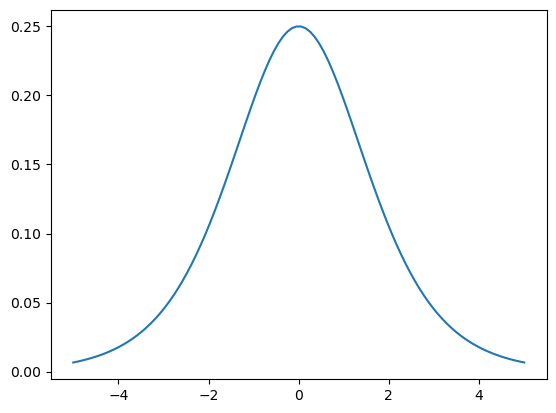

In [116]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
y = []
for i in x:
    y.append(sigmoid(i)*(1-sigmoid(i)))
plt.plot(x,y)

In [117]:
from tensorflow.keras.layers import SimpleRNN

In [118]:
SimpleRNN??

Init signature:
SimpleRNN(
    units,
    activation='tanh',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    **kwargs,
)
Source:        
@keras_export("keras.layers.SimpleRNN")
class SimpleRNN(RNN):
    """Fully-connected RNN where the output is to be fed back to input.

    See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
    for details about the usage of RNN API.

    Args:
      units: Positive integer, dimensionality of the output space.
      activation: Activation function to use.
        Default: hyperbolic tangen

In [119]:
model = Sequential(
    Embedding(2000,32,input_length=100),
    
)

In [120]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [121]:
1-(1/tanh(x[0]))**2

-0.00018161620940215784

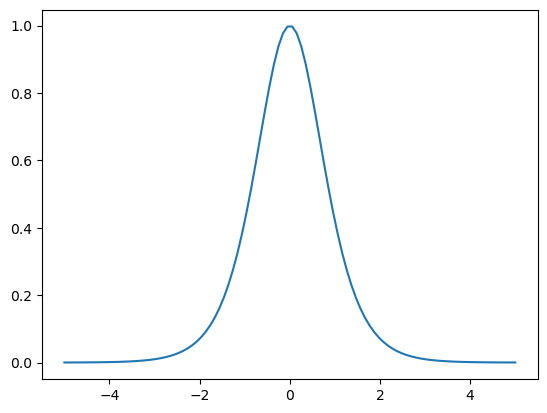

In [125]:
x = np.linspace(-5,5,100)
plt.plot(x,(1-tanh(x)**2))

In [126]:
from tensorflow.keras.layers import LSTM

In [127]:
model = Sequential(
    [
        Embedding(2000,32,input_length=100),
        LSTM(64,return_sequences=True),
        BatchNormalization(),
        Flatten(),
        Dense(2048,activation='tanh'),
        BatchNormalization(),
        Dense(1024,activation='relu'),
        Dense(46,activation='softmax')
    ]
)

In [128]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 32)           64000     
                                                                 
 lstm (LSTM)                 (None, 100, 64)           24832     
                                                                 
 batch_normalization_4 (Batc  (None, 100, 64)          256       
 hNormalization)                                                 
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0         
                                                                 
 dense_18 (Dense)            (None, 2048)              13109248  
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [129]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accurac'])

In [1]:
from konlpy.tag import Okt

In [2]:
okt = Okt()

In [3]:
sentence = '아버지가방에들어가신다'
okt.pos(sentence)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]